In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

### Problem 4. Differentiate the given data (second derivative) using order $h^2$ formulas.

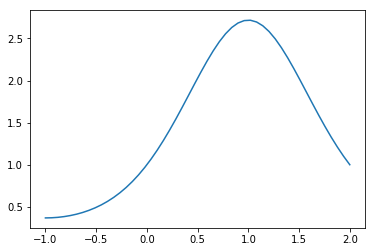

In [3]:
# x-grid
x = np.linspace(-1,2)
# y-grid function data to be differentiated
y = np.array([0.36787944, 0.3695833 , 0.37472639, 0.3834033 , 0.39577209,
       0.41205464, 0.4325367 , 0.45756722, 0.48755638, 0.52297146,
       0.56432968, 0.61218696, 0.66712133, 0.7297099 , 0.80049825,
       0.87996147, 0.96845663, 1.06616726, 1.17304144, 1.28872658,
       1.41250547, 1.54323944, 1.67932608, 1.81867921, 1.95873898,
       2.09651826, 2.22868923, 2.35171009, 2.4619873 , 2.55606361,
       2.6308181 , 2.68366067, 2.71270256, 2.71688558, 2.69605613,
       2.6509761 , 2.58326925, 2.49530913, 2.39006056, 2.27089098,
       2.14137032, 2.00507717, 1.86542667, 1.72553112, 1.58809993,
       1.45537996, 1.32913398, 1.21065148, 1.10078441, 1.        ])
plt.plot(x,y);

In [4]:
n=len(x)
h=(x[-1]-x[0])/(n-1)
s_int=np.array([1,-2,1])/h**2 #[u[0],u[1],u[2]], [u[1],u[2],u[3]],...,[u[n-3],u[n-2],u[n-1]]
s_left=np.array([2,-5,4,-1])/h**2 #[u[0],u[1],u[2],u[3]]
s_right=np.array([-1,4,-5,2])/h**2 #[u[-4],u[-3],u[-2],u[-1]]

In [15]:
ypp=[]
ypp.append(np.array([y[0],y[1],y[2],y[3]]).dot(s_left))
for k in range(1,n-1):
    ypp.append(np.array([y[k-1],y[k],y[k+1]]).dot(s_int))
ypp.append(np.array([y[-4],y[-3],y[-2],y[-1]]).dot(s_right))

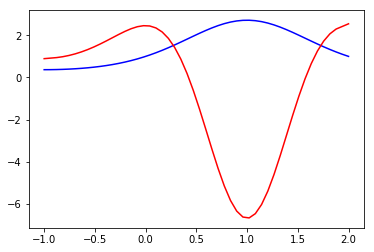

In [17]:
plt.plot(x,y,'b',x,ypp,'r');

### Problem 5 Reconstruct $f(x) = |x|$ using a DCT or DST.

In [26]:
Nk=12
npts=17
x=np.linspace(-np.pi,np.pi,npts)
x=x[:-1]
k=np.arange(-Nk/2+1,Nk/2+1)
k=np.c_[k]
f=np.abs(x)
C=np.cos(k*x)
a=C.dot(f)/(npts-1)

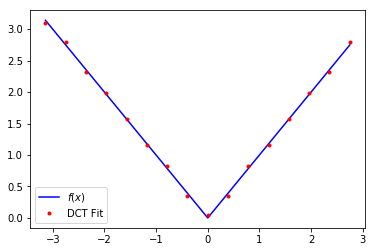

In [27]:
plt.plot(x,f,'b',x,a.dot(C),'r.')
plt.legend(['$f(x)$','DCT Fit']);

### Problem 6 Reconstruct $f(x) = x$ using a DCT or DST.

In [48]:
Nk=12
npts=17
x=np.linspace(-np.pi,np.pi,npts)
x=x[1:-1]
k=np.arange(-Nk/2+1,Nk/2+1)
k=np.c_[k]
f=x
S=np.sin(k*x)
b=S.dot(f)/(npts-2)

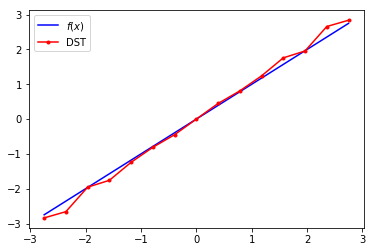

In [49]:
plt.plot(x,f,'b',x,b.dot(S),'r.-')
plt.legend(['$f(x)$','DST']);

### Problem 7. Use SciPy's interpolate1d to interpolate the given data with a cubic polynomial.

In [37]:
# x-grid (nodes)
x = np.array([-0.88850562, -0.67304469, -0.57379203, -0.34011603, -0.11320639,
        0.03353445,  0.14870053,  0.27509413,  0.55877798,  0.7593268 ,
        0.89237646])
# data ordinates
f = np.array([0.04822518, 0.08113769, 0.10833142, 0.2569391 , 0.75735075,
       0.9726548 , 0.64399952, 0.34579109, 0.11356125, 0.06487428,
       0.04782768])
# interpolation grid (xnew in the documentation)
xp = np.linspace(-0.87,0.87,19)

In [39]:
y=interpolate.interp1d(x,f,'cubic')
fnew=y(xp)

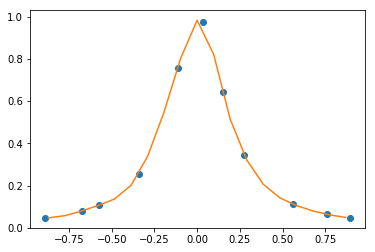

In [40]:
plt.plot(x,f,'o',xp,fnew,'-');